# **Bootcamp Data Science na Prática II: Exemplo de Projeto**

**Autoras do Notebook:** Ana Clara Mioto e Patricia de Alencar Tozi

1. Passo-a-passo de um Projeto de Data Science 
2. Passo-a-passo da Análise Exploratória
3. Bônus: Modelagem de Dados
4. Materiais de Estudo

## **Projeto de Data Science**

### Passo-a-passo

![picture](https://drive.google.com/uc?id=1obFDbhG3feu7_Hc0JqFdOaHGsojsaQ6F)







*Referências: Rezende, S. O. Sistemas inteligentes: fundamentos e aplicações. Editora Manole Ltda, 2003;  Aula 1 - Professor Ricardo Marcacini - Mineração de Dados Não Estruturados, ICMC-USP*


**1. Identificação do Problema:** entender o objetivo dessa aplicação, quais os dados que serão trabalhados, o que queremos alcançar/metas.

**2. Pré-processamento:** analise exploratória, limpeza (valores ausentes e inconsistentes), transformação de dados(conversão de valores, normalização, padronização), redução da dimensionalidade, balanceamento dos dados.

**3. Extração de padrões:** aplicar técnicas de machine learning.

**4. Pós-processamento:** métricas de avaliação, verificar as metas.

**5. Utilização do conhecimento:** aplicar no mercado (diagnóstico de doenças, análise de fraude, métricas de redes sociais)

## **Análise Exploratória**

Trabalharemos com o dataset sobre preços de abacates.
Para saber mais sobre: https://www.kaggle.com/neuromusic/avocado-prices




### **Carregamento dos dados**

In [ ]:
# Importação de bibliotecas
import pandas as pd           # Renomeando a biblioteca pandas para pd
import numpy as np            # Renomeando a biblioteca numpy para np

# Aqui, estamos importando o arquivo CSV para o ambiente do Colab utilizando o 
# comando read_csv() da biblioteca pandas, que transforma o conjunto de dados 
# em um formato chamado DataFrame.
dataframe = pd.read_csv('/content/sample_data/avocado.csv', sep=',', index_col=0)

# Para verificar as primeiras linhas do DataFrame criado, utilizamos o comando
# head(). Nesse caso, sem nenhum parâmetro dentro do parênteses, são apresentadas
# apenas as 5 primeiras linhas. Se você deseja observar as 10 primeiras linhas,
# por exemplo, o comando deve ser: dataframe.head(10)
dataframe.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### **Descrição das colunas relevantes**



*   `Date`: data de observação
*   `AveragePrice`: preço médio de um abacate simples
*   `Total Volume`: quantidade total de abacates vendidos
*   `4046`: quantidade de abacates não-orgânicos de tamanho pequeno/médio (PLU 4046) vendidos
*   `4225`: quantidade de abacates não-orgânicos de tamanho grande (PLU 4225) vendidos
*   `4770`: quantidade de abacates não-orgânicos de tamanho extra grande (PLU 4770) vendidos
*   `type`: convencional ou orgânica 
*   `year`: ano
*   `region`: região ou cidade onde os dados foram coletados

### **Visão Geral**

Antes de começarmos a análise exploratória do nosso conjunto de dados, é  importante analisar algumas informações relevantes sobre o mesmo.

O comando `info()` fornece informações gerais sobre as colunas, a quantidade de valores não nulos e o tipo (`dtype`) das variáveis para cada uma dessas colunas.

O comando `shape` fornece a quantidade de linhas e colunas respectivamente.

Já o comando `describe()` apresenta alguns fatores estatísticos para cada coluna do DataFrame, como o `count` (soma de todos os valores numéricos) e a `mean` (média aritmética desses valores). 

In [ ]:
# Informações gerais
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [ ]:
# Tamanho do DataFrame (linhas, colunas)
dataframe.shape

(18249, 13)

In [ ]:
# Descrição estatística
dataframe.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### **Exploração dos dados**

Um fator que pode influenciar em muito na sua análise exploratória é a presença de colunas com muitos valores nulos (chamamos de valores `null`). Para tanto, precisamos identificar a quantidade de valores nulos no conjunto de dados em questão, utilizando os comandos `isnull()` e `sum()`, um seguido do outro:

In [ ]:
dataframe.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No caso, não há nenhum valor nulo nas colunas do DataFrame.

Para analisar a quantidade de cada tipo de abacate (convencional ou orgânico), sendo valores associados à coluna `type` do DataFrame, utilizamos o comando `value_counts()` apenas para a coluna `type` (`dataframe['type']`):

In [ ]:
dataframe['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

Agora, queremos descobrir a quantidade de registros (linhas) de abacates vendidos para cada região. Para tanto, aplicamos o comando `value_counts()` novamente para os valores da coluna `region` (`dataframe['region']`):

In [ ]:
dataframe['region'].value_counts()

CincinnatiDayton       338
StLouis                338
Atlanta                338
Portland               338
Seattle                338
Tampa                  338
RichmondNorfolk        338
TotalUS                338
Detroit                338
Southeast              338
GreatLakes             338
Denver                 338
Indianapolis           338
HartfordSpringfield    338
NorthernNewEngland     338
RaleighGreensboro      338
Columbus               338
Plains                 338
Spokane                338
GrandRapids            338
SouthCentral           338
Houston                338
BaltimoreWashington    338
DallasFtWorth          338
Sacramento             338
NewOrleansMobile       338
Midsouth               338
Chicago                338
SanFrancisco           338
Orlando                338
MiamiFtLauderdale      338
Roanoke                338
PhoenixTucson          338
LosAngeles             338
Louisville             338
SanDiego               338
Syracuse               338
N

Como o DataFrame já possui uma coluna Ano, removeremos a coluna que apresenta as datas (`Date`), visto que seriam valores redundantes para a nossa análise. Então, utilizando o comando `drop()`, incluindo a coluna que queremos retirar do DataFrame nos parâmetros de entrada.

In [ ]:
dataframe.drop(columns='Date', axis = 1, inplace = True)

Depois de remover a coluna de datas, verificaremos quais colunas restaram utilizando o comando `columns`:

In [ ]:
# Verificando quais colunas permaneceram no DataFrame
dataframe.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

Outra análise interessante que podemos fazer, é observar o volume total de abacates vendidos para cada tipo, que pode ser realizado através do comando a seguir utilizando `groupby` ("agrupamento por"):

In [ ]:
dataframe.groupby('type')['Total Volume'].agg(['sum']).round()

,sum
type,
conventional,1.508722e+10
organic,4.361817e+08


Também, é relevante verificar o preço médio dos abacates vendidos para cada tipo:

In [ ]:
dataframe.groupby('type')['AveragePrice'].agg(['mean']).round(2)

,mean
type,
conventional,1.16
organic,1.65


### **Visualização das informações**

Antes de começarmos efetivamente a nossa modelagem de dados, é importante obter informações através de gráficos criados a partir do conjunto de dados em estudo.

Primeiramente, importaremos as bibliotecas de visualização `seaborn` e `matplotlib`.

In [ ]:
# Importação das bibliotecas de visualização
import seaborn as sns
import matplotlib.pyplot as plt

Em seguida, queremos criar um gráfico que apresenta a contagem de cada tipo de abacate (dados da coluna `type`). Utilizaremos o comando `countplot()`, parametrizando os valores da coluna de tipos (`dataframe['type']`):

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


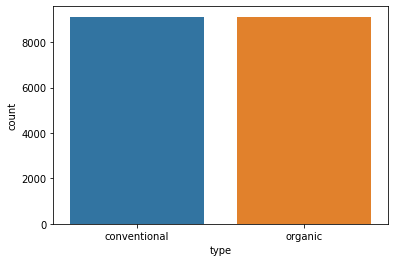

In [ ]:
sns.countplot(dataframe['type'])

Por último, criaremos um gráfico através do comando `lineplot()`, passando como parâmetros os valores da coluna **Ano** (`dataframe['year']`) para o eixo x e os valores da coluna **Média aritmética de preços** (`dataframe['AveragePrice']`) para o eixo x, no intuito de observar as distribuições da média de preços pelos anos de estudo.

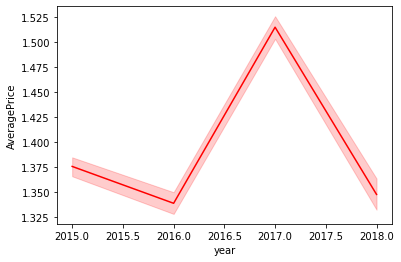

In [ ]:
# Distribuição da Média de preços pelos valores da coluna Ano
sns.lineplot(x = dataframe['year'], y = dataframe['AveragePrice'], color = "red")

# Comando da biblioteca matplotlib para apresentar no output o gráfico criado
# anteriormente. 
plt.show()

## **Bônus: Modelagem de Dados**

Vamos predizer os preços médios dos abacates, utilizando um modelo de Regressão Linear. Serão utilizados os seguintes comandos da biblioteca `sklearn`: 
técnicas `model_selection`

*   `train_test_split` da técnica `model_selection`: divide o dataset em uma parte para treino e outra para validação.
*   `LinearRegression` da técnica `linear_model`: aplica a função de Regressão Linear para modelagem dos dados.
*   `r2_score` da técnica `metrics`: utilizado para verificar a acurácia do nosso modelo (porcentagem de acerto).

In [ ]:
# Importação das bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Em seguida, definimos a coluna que gostaríamos de utilizar como alvo da modelagem, no caso, os valores da coluna `AveragePrice`. Para tanto, armazenamos todos os valores da coluna em questão para a variável `y` e todas os valores das outras colunas para a variável `X`, transformando todas as variáveis categóricas (não numéricas) destas outras colunas em valores numéricos com o comando `get_dummies()` da biblioteca `pandas`.

Por fim, dividimos o dataset em valores de treino (`train`) e teste de validação  (`test`), através do comando `train_test_split()`.

In [ ]:
# Armazenamento dos valores da coluna AveragePrice na variável y
y = dataframe['AveragePrice']  
# Armazenamento dos valores das outras colunas restantes na variável X
X = dataframe.drop(['AveragePrice'], axis = 1)

# Transformando as variáveis categóricas em numéricas
X = pd.get_dummies(X)

# Separando o dataset em parcelas de teste e treino de validação 
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state = 42)

### **Regressão Linear**

Nesta etapa da modelagem, aplicamos a função de Regressão Linear propriamente dita. Primeiro, instanciamos a função com o comando `LinearRegression()`, armazenando na variável `lr`, e, depois, aplicamos o método `fit()` com os parâmetros de treino (`X_train` e `y_train`) para efetivamente treinar o modelo criado.

In [ ]:
# Instanciando a regressão
lr = LinearRegression()

# Treinando o modelo
modelo = lr.fit(X_train, y_train)

Então, utilizamos o método `predict()` sobre o objeto `lr`, passando o parâmetro de teste do eixo X (`X_test`) para encontrar as médias de preço dos abacates (valor armazenado na variável `y_pred`):

In [ ]:
# Predição dos preços médios dos abacates
y_pred = lr.predict(X_test)

Por último, extraimos a acurácia (porcentagem de acerto) do nosso modelo através do método `r2_score()`:

In [ ]:
 # Acurácia do modelo criado
 r2_score(y_test, y_pred)

0.550200403020398

Com isso, verificamos que o modelo de Regressão Linear possui uma porcentagem de acerto parcialmente satisfatória (cerca de 55,02%) para predizer a média de preços dos abacates.

## **Materiais de Estudo**

Recomendamos que vocês estudem todos os materiais apresentados durante o Bootcamp, reveja as gravações de cada dia caso necessário, e olhe o tutorial de como usar o Colab da Alura caso seja necessário.

Bons estudos! :)

*   *Tutorial de como usar o Colab:* https://www.alura.com.br/artigos/google-colab-o-que-e-e-como-usar
*   *Aula de introdução a Python:*
https://github.com/patriciatozi/analytics-training-python/blob/main/Treinamento_Analytics_Introdu%C3%A7%C3%A3o_%C3%A0_L%C3%B3gica_de_Programa%C3%A7%C3%A3o.ipynb
*   *Aula de Visualização de Dados com Seaborn:* https://drive.google.com/drive/folders/1Ru08TPT2Gl0gd_VLpKlaqDiiM4QDfiih?usp=sharing
*   *Gravação do primeiro dia do Bootcamp:* https://drive.google.com/file/d/1kVzrImt1AUO5dVn_b5Xn3i6sBpjXDtyb/view?usp=sharing
*   *Gravação do segundo dia do Bootcamp:* https://drive.google.com/file/d/1jqc4HDcntoikMpsxifjBabYqw1a_AZui/view?usp=sharing
*   *Gravação do terceiro dia do Bootcamp:* https://drive.google.com/file/d/1eqfZDFXIPj0FUuqQWYuO8SoSiigDRw6I/view?usp=sharing